<a href="https://colab.research.google.com/github/amalMalqahtani/Week5/blob/main/Copy_of_Task_1_Artificial_Neural_Networks_(ANN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [263]:
#https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing
!pip install gdown
!gdown --id 1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

but Gdown can't. Please check connections and permissions.


## Importing Libraries

In [264]:
import pandas as pd
import seaborn as sns
import os
from keras.models import Model
import numpy as np
from keras.layers import Dense, GlobalAveragePooling2D
from keras import layers
from keras import activations
import matplotlib.pyplot as plt
from tensorflow import data as tf_data
import keras
from keras import ops
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.layers import Input

## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [265]:
df = pd.read_csv('/content/Bus_Breakdown_and_Delays.csv')

In [266]:
df.head(6)

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K
5,2015-2016,1225671,Special Ed AM Run,12568,P640,Heavy Traffic,24071,10/16/2015 07:20:00 AM,10/28/2015 09:38:00 AM,NaN,...,15mins,3,Yes,Yes,Yes,10/28/2015 09:38:00 AM,NaN,10/28/2015 09:38:12 AM,Running Late,School-Age


In [267]:
df.tail(10)

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
147962,2016-2017,1330882,Pre-K/EI,3509,B0912A,Other,C008,03/16/2017 07:07:00 AM,03/16/2017 07:47:00 AM,Brooklyn,...,NaN,5,Yes,Yes,Yes,03/16/2017 07:47:00 AM,NaN,03/16/2017 07:47:15 AM,Breakdown,Pre-K
147963,2016-2017,1332425,Pre-K/EI,117,1,Other,S188,03/20/2017 03:41:00 PM,03/20/2017 03:43:00 PM,Bronx,...,60 MINS,10,Yes,Yes,No,03/20/2017 03:43:00 PM,NaN,03/20/2017 03:43:41 PM,Running Late,Pre-K
147964,2016-2017,1334061,Pre-K/EI,333,14,Heavy Traffic,C998,03/24/2017 03:40:00 PM,03/24/2017 03:47:00 PM,Bronx,...,5MINUTES.,0,Yes,Yes,No,03/24/2017 03:47:00 PM,NaN,03/24/2017 03:47:51 PM,Running Late,Pre-K
147965,2016-2017,1334597,Pre-K/EI,9313,4,Heavy Traffic,C457,03/27/2017 08:09:00 AM,03/27/2017 08:13:00 AM,Bronx,...,30 minutes,0,Yes,Yes,No,03/27/2017 08:13:00 AM,NaN,03/27/2017 08:13:49 AM,Running Late,Pre-K
147966,2016-2017,1337850,Pre-K/EI,118,3,Heavy Traffic,C037,04/04/2017 07:55:00 AM,04/04/2017 08:03:00 AM,Bronx,...,15-20,8,Yes,Yes,No,04/04/2017 08:03:00 AM,NaN,04/04/2017 08:03:45 AM,Running Late,Pre-K
147967,2016-2017,1338452,Pre-K/EI,9345,2,Heavy Traffic,C530,04/05/2017 08:00:00 AM,04/05/2017 08:10:00 AM,Bronx,...,15-20,7,Yes,Yes,No,04/05/2017 08:10:00 AM,NaN,04/05/2017 08:10:15 AM,Running Late,Pre-K
147968,2016-2017,1341521,Pre-K/EI,0001,5,Heavy Traffic,C579,04/24/2017 07:42:00 AM,04/24/2017 07:44:00 AM,Bronx,...,20 MINS,0,Yes,Yes,No,04/24/2017 07:44:00 AM,NaN,04/24/2017 07:44:15 AM,Running Late,Pre-K
147969,2016-2017,1353044,Special Ed PM Run,GC0112,X928,Heavy Traffic,09003,05/25/2017 04:22:00 PM,05/25/2017 04:28:00 PM,Bronx,...,20-25MINS,0,Yes,Yes,Yes,05/25/2017 04:28:00 PM,90323827,05/25/2017 04:34:36 PM,Running Late,School-Age
147970,2016-2017,1353045,Special Ed PM Run,5525D,Q920,Won`t Start,24457,05/25/2017 04:27:00 PM,05/25/2017 04:30:00 PM,Queens,...,NaN,0,Yes,Yes,No,05/25/2017 04:30:00 PM,NaN,05/25/2017 04:30:07 PM,Breakdown,School-Age
147971,2016-2017,1353046,Project Read PM Run,2530,K617,Other,21436,05/25/2017 04:36:00 PM,05/25/2017 04:37:00 PM,Brooklyn,...,45min,7,Yes,Yes,Yes,05/25/2017 04:37:00 PM,NaN,05/25/2017 04:37:37 PM,Running Late,School-Age


In [268]:
rows , columns = df.shape

In [269]:
rows

147972

In [270]:
columns

21

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [272]:
df.describe()

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
count,1.479720e+05,147972.000000
mean,1.287779e+06,3.590071
std,4.324338e+04,55.365859
min,1.212681e+06,0.000000
25%,1.250438e+06,0.000000
50%,1.287844e+06,0.000000
75%,1.325191e+06,4.000000
max,1.362605e+06,9007.000000


In [273]:
df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


In [274]:
df.duplicated().sum()

0

In [275]:
df['Busbreakdown_ID'].drop_duplicates()

,Busbreakdown_ID
0,1224901
1,1225098
2,1215800
3,1215511
4,1215828
...,...
147967,1338452
147968,1341521
147969,1353044
147970,1353045


In [276]:
df.value_counts().sum()

5024

In [277]:
df["Created_On"] = pd.to_datetime(df["Created_On"])
df["Last_Updated_On"] = pd.to_datetime(df["Last_Updated_On"])
df["Occurred_On"] = pd.to_datetime(df["Occurred_On"])

In [278]:
df['School_Year'].min()

'2015-2016'

In [279]:
df['School_Year'].max()

'2019-2020'

In [280]:
df['Run_Type'].unique()

array(['Pre-K/EI', 'Special Ed AM Run', 'General Ed AM Run',
       'Special Ed PM Run', 'General Ed PM Run', 'Special Ed Field Trip',
       'General Ed Field Trip', nan, 'Project Read PM Run',
       'Project Read AM Run', 'Project Read Field Trip'], dtype=object)

In [281]:
df['Occurred_On'].min()

Timestamp('2015-09-01 06:12:00')

In [282]:
df['Occurred_On'].max()

Timestamp('2020-03-30 06:30:00')

In [283]:
df['Bus_No'].unique()

array(['811', '9302', '358', ..., '0096', 'GVC510', 'K9345'], dtype=object)

In [284]:
df['Last_Updated_On'].min()

Timestamp('2015-09-01 06:16:07')

In [285]:
df['Last_Updated_On'].max()

Timestamp('2017-07-19 16:05:59')

In [286]:
df['Breakdown_or_Running_Late'].describe()

,Breakdown_or_Running_Late
count,147972
unique,2
top,Running Late
freq,130857


In [287]:
df['School_Age_or_PreK'].unique()

array(['Pre-K', 'School-Age'], dtype=object)

In [288]:
categorical_colmuns = df.select_dtypes('object','category')

In [289]:
df['Incident_Number'].value_counts().sum()

5632

In [290]:
categorical_colmuns.columns

Index(['School_Year', 'Run_Type', 'Bus_No', 'Route_Number', 'Reason',
       'Schools_Serviced', 'Boro', 'Bus_Company_Name', 'How_Long_Delayed',
       'Has_Contractor_Notified_Schools', 'Has_Contractor_Notified_Parents',
       'Have_You_Alerted_OPT', 'Informed_On', 'Incident_Number',
       'Breakdown_or_Running_Late', 'School_Age_or_PreK'],
      dtype='object')

In [291]:
df['How_Long_Delayed'].unique()

array(['10MINUTES', '25 MINUTES', '15 MINUTES', ..., '40 -50 MIN',
       '80 MIN', '45 MINIUTE'], dtype=object)

In [292]:
Numerical_columns = df.drop(['Busbreakdown_ID'], axis=1)

In [293]:
Numerical_columns = df.select_dtypes('number')

In [294]:
Numerical_columns.columns

Index(['Busbreakdown_ID', 'Number_Of_Students_On_The_Bus'], dtype='object')

In [295]:
df["Number_Of_Students_On_The_Bus"].mean()

3.590071094531398

<Axes: xlabel='Has_Contractor_Notified_Parents', ylabel='Number_Of_Students_On_The_Bus'>

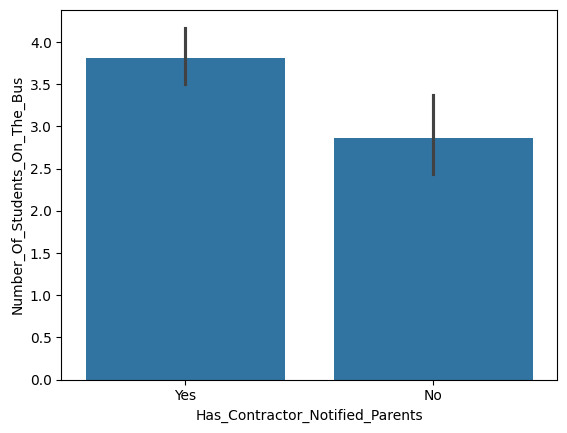

In [296]:
sns.barplot(data=df, x="Has_Contractor_Notified_Parents", y="Number_Of_Students_On_The_Bus")

<Axes: xlabel='School_Year', ylabel='Number_Of_Students_On_The_Bus'>

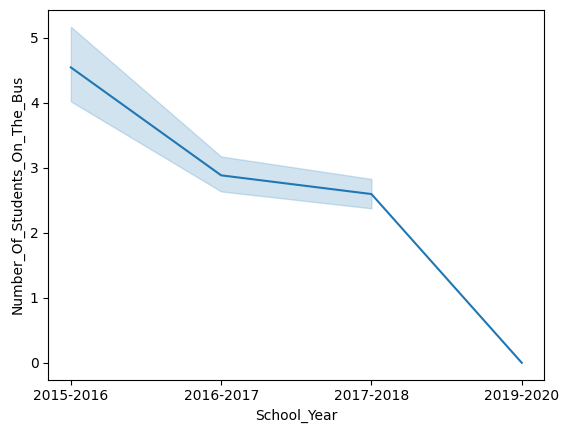

In [297]:
sns.lineplot(data=df, x="School_Year", y="Number_Of_Students_On_The_Bus")

In [298]:
df['Has_Contractor_Notified_Schools'].unique()

array(['Yes', 'No'], dtype=object)

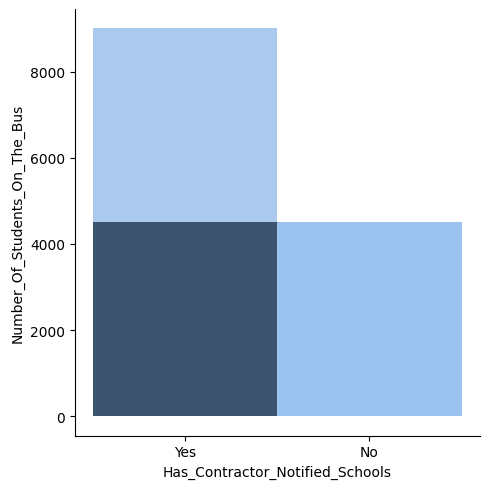

In [299]:
sns.displot(df, x="Has_Contractor_Notified_Schools",y="Number_Of_Students_On_The_Bus", bins=2)

In [300]:
df.groupby(["Created_On", "Occurred_On"])[["Last_Updated_On"]].mean()

Last_Updated_On
Created_On          Occurred_On                            
2015-09-01 06:16:00 2015-09-01 06:12:00 2015-09-01 06:16:07
2015-09-01 06:28:00 2015-09-01 06:20:00 2015-09-01 06:28:05
2015-09-01 06:32:00 2015-09-01 06:17:00 2015-09-01 06:34:26
                    2015-09-01 06:32:00 2015-09-01 09:39:36
2015-09-01 06:35:00 2015-09-01 06:34:00 2015-09-01 09:49:53
...                                                     ...
2017-07-19 15:36:00 2017-07-19 15:15:00 2017-07-19 15:41:40
2017-07-19 15:41:00 2017-07-19 15:36:00 2017-07-19 15:41:43
2017-07-19 15:44:00 2017-07-19 15:35:00 2017-07-19 15:50:59
2017-07-19 15:49:00 2017-07-19 15:47:00 2017-07-19 15:49:52
2017-07-19 16:05:00 2017-07-19 11:40:00 2017-07-19 16:05:59

[132571 rows x 1 columns]

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [301]:
from sklearn.model_selection import train_test_split

In [302]:
X = df.drop(['Breakdown_or_Running_Late' ,'Busbreakdown_ID'] , axis=1)
y = df['Breakdown_or_Running_Late']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [303]:
X

,School_Year,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,Bus_Company_Name,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,School_Age_or_PreK
0,2015-2016,Pre-K/EI,811,1,Other,C353,2015-10-26 08:30:00,2015-10-26 08:40:00,Bronx,"G.V.C., LTD.",10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,2015-10-26 08:40:39,Pre-K
1,2015-2016,Pre-K/EI,9302,1,Heavy Traffic,C814,2015-10-27 07:10:00,2015-10-27 07:11:00,Bronx,"G.V.C., LTD.",25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,2015-10-27 07:11:22,Pre-K
2,2015-2016,Pre-K/EI,358,2,Heavy Traffic,C195,2015-09-18 07:36:00,2015-09-18 07:38:00,Bronx,"G.V.C., LTD.",15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,2015-09-18 07:38:44,Pre-K
3,2015-2016,Pre-K/EI,331,2,Other,C178,2015-09-17 08:08:00,2015-09-17 08:12:00,Bronx,"G.V.C., LTD.",10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,2015-09-17 08:12:08,Pre-K
4,2015-2016,Pre-K/EI,332,2,Other,S176,2015-09-18 07:39:00,2015-09-18 07:45:00,Bronx,"G.V.C., LTD.",10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,2015-09-18 07:56:40,Pre-K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147967,2016-2017,Pre-K/EI,9345,2,Heavy Traffic,C530,2017-04-05 08:00:00,2017-04-05 08:10:00,Bronx,"G.V.C., LTD.",15-20,7,Yes,Yes,No,04/05/2017 08:10:00 AM,NaN,2017-04-05 08:10:15,Pre-K
147968,2016-2017,Pre-K/EI,0001,5,Heavy Traffic,C579,2017-04-24 07:42:00,2017-04-24 07:44:00,Bronx,"G.V.C., LTD.",20 MINS,0,Yes,Yes,No,04/24/2017 07:44:00 AM,NaN,2017-04-24 07:44:15,Pre-K
147969,2016-2017,Special Ed PM Run,GC0112,X928,Heavy Traffic,09003,2017-05-25 16:22:00,2017-05-25 16:28:00,Bronx,G.V.C. LTD. (B2192),20-25MINS,0,Yes,Yes,Yes,05/25/2017 04:28:00 PM,90323827,2017-05-25 16:34:36,School-Age
147970,2016-2017,Special Ed PM Run,5525D,Q920,Won`t Start,24457,2017-05-25 16:27:00,2017-05-25 16:30:00,Queens,LITTLE RICHIE BUS SERVICE,NaN,0,Yes,Yes,No,05/25/2017 04:30:00 PM,NaN,2017-05-25 16:30:07,School-Age


In [304]:
y

,Breakdown_or_Running_Late
0,Running Late
1,Running Late
2,Running Late
3,Running Late
4,Running Late
...,...
147967,Running Late
147968,Running Late
147969,Running Late
147970,Breakdown


In [305]:
X_train

,School_Year,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,Bus_Company_Name,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,School_Age_or_PreK
124605,2016-2017,Special Ed AM Run,212,W926,Heavy Traffic,75404,2017-05-05 08:26:00,2017-05-05 08:26:00,Westchester,MAR-CAN TRANSPORT CO. INC,1 HOUR,3,No,No,No,05/05/2017 08:26:00 AM,NaN,2017-05-05 08:48:33,School-Age
50789,2015-2016,Special Ed PM Run,5053,K665,Heavy Traffic,21225,2016-05-25 13:53:00,2016-05-25 13:56:00,Brooklyn,"RELIANT TRANS, INC. (B232",20 min,0,Yes,Yes,Yes,05/25/2016 01:56:00 PM,NaN,2016-05-25 13:56:44,School-Age
80097,2016-2017,Special Ed AM Run,2730,K568,Delayed by School,22119,2016-11-17 14:24:00,2016-11-17 14:26:00,Brooklyn,"RELIANT TRANS, INC. (B232",25 minS,2,Yes,Yes,Yes,11/17/2016 02:26:00 PM,NaN,2016-11-17 14:26:41,School-Age
10799,2015-2016,Special Ed AM Run,5521D,X599,Heavy Traffic,07006,2015-10-02 07:59:00,2015-10-02 08:04:00,Bronx,LITTLE RICHIE BUS SERVICE,30MINS,4,Yes,Yes,No,10/02/2015 08:04:00 AM,NaN,2015-10-02 08:04:03,School-Age
144657,2016-2017,Special Ed AM Run,85006,R803,Heavy Traffic,31013,2016-11-07 07:50:00,2016-11-07 07:58:00,Staten Island,"BORO TRANSIT, INC.",20 min,0,Yes,Yes,No,11/07/2016 07:58:00 AM,NaN,2016-11-07 07:58:37,School-Age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,2016-2017,Special Ed PM Run,39,M260,Heavy Traffic,02909,2017-04-21 13:57:00,2017-04-21 14:02:00,Manhattan,CAREFUL BUS,60 min,0,Yes,No,No,04/21/2017 02:02:00 PM,NaN,2017-04-21 14:02:33,School-Age
103694,2016-2017,General Ed PM Run,2590,X9261,Late return from Field Trip,11003,2017-02-16 14:47:00,2017-02-16 14:56:00,Bronx,BOBBY`S BUS CO. INC.,10-12,0,No,Yes,No,02/16/2017 02:56:00 PM,NaN,2017-02-16 14:57:23,School-Age
131932,2016-2017,General Ed AM Run,1222,Q2974,Mechanical Problem,29095,2017-05-30 06:33:00,2017-05-30 06:33:00,Queens,QUALITY TRANSPORTATION CO,20 MINS,0,No,No,No,05/30/2017 06:33:00 AM,NaN,2017-05-30 07:03:59,School-Age
146867,2016-2017,Special Ed AM Run,48192,Q471,Heavy Traffic,27351,2017-06-01 07:56:00,2017-06-01 08:06:00,Queens,"BORO TRANSIT, INC.",30min,0,Yes,Yes,Yes,06/01/2017 08:06:00 AM,NaN,2017-06-01 08:06:38,School-Age


In [306]:
X_test

,School_Year,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,Bus_Company_Name,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,School_Age_or_PreK
77409,2016-2017,Special Ed AM Run,9984,M024,Other,05161,2016-11-07 07:07:00,2016-11-07 07:08:00,Manhattan,HAPPY CHILD TRANS LLC (B2,30 MIN,2,Yes,Yes,No,11/07/2016 07:08:00 AM,NaN,2016-11-07 07:08:20,School-Age
94371,2016-2017,Special Ed AM Run,57D,L344,Heavy Traffic,23137,2017-01-12 07:59:00,2017-01-12 08:01:00,Brooklyn,LORINDA ENT. LTD.,25 MINS.,6,Yes,Yes,No,01/12/2017 08:01:00 AM,NaN,2017-01-12 10:16:10,School-Age
103590,2016-2017,Special Ed AM Run,1387,M605,Heavy Traffic,"02158, 02300, 02177, 02167",2017-02-16 08:10:00,2017-02-16 08:11:00,Manhattan,LEESEL TRANSP CORP (B2192,25-30 MINS,6,Yes,Yes,No,02/16/2017 08:11:00 AM,NaN,2017-02-16 08:11:31,School-Age
94136,2016-2017,Special Ed AM Run,NI2112,K202,Heavy Traffic,18066,2017-01-12 06:41:00,2017-01-12 06:42:00,Brooklyn,"NEW DAWN TRANSIT, LLC (B2",30 MINUTES,0,Yes,Yes,No,01/12/2017 06:42:00 AM,NaN,2017-01-12 06:42:16,School-Age
94139,2016-2017,Special Ed AM Run,74D,X927,Won`t Start,09204,2017-01-12 06:42:00,2017-01-12 06:43:00,Bronx,LITTLE LISA BUS CO. INC.,NaN,0,Yes,Yes,No,01/12/2017 06:43:00 AM,NaN,2017-01-12 10:54:55,School-Age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50857,2015-2016,Pre-K/EI,0090,48 PM,Won`t Start,C528,2016-05-25 14:05:00,2016-05-25 15:21:00,Brooklyn,PENNY TRANSPORTATION,NaN,0,Yes,Yes,No,05/25/2016 03:21:00 PM,NaN,2016-05-25 15:21:57,Pre-K
70645,2016-2017,General Ed AM Run,2826,K1818,Mechanical Problem,18684,2016-10-11 06:30:00,2016-10-11 06:38:00,Brooklyn,JOFAZ TRANSPORTATION INC.,1hr,0,Yes,Yes,No,10/11/2016 06:38:00 AM,NaN,2016-10-11 06:38:23,School-Age
91899,2015-2016,General Ed AM Run,105,R1284,Heavy Traffic,31022,2015-10-19 06:05:00,2015-10-19 06:18:00,Staten Island,PIONEER TRANSPORTATION CO,10-15MINS,0,Yes,No,No,10/19/2015 06:18:00 AM,NaN,2015-10-19 06:18:44,School-Age
32183,2015-2016,Special Ed AM Run,2551,M173,Heavy Traffic,02169,2016-02-26 06:17:00,2016-02-26 06:19:00,Manhattan,"RELIANT TRANS, INC. (B232",20 MIN,0,Yes,Yes,Yes,02/26/2016 06:19:00 AM,NaN,2016-02-26 06:19:06,School-Age


## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [307]:
import keras
from keras import layers
from keras import activations
from keras import ops

In [308]:
keras.Sequential(layers=None, trainable=True, name=None)

<Sequential name=sequential_35, built=False>

In [309]:
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu", name="layer1"),
        layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(4, name="layer3"),
    ]
)

In [310]:
model.add(layers.Dense(64))
model.add(layers.Activation(activations.relu))

In [311]:
layer1 = layers.Dense(2, activation="relu", name="layer1")
layer2 = layers.Dense(3, activation="relu", name="layer2")
layer3 = layers.Dense(4, name="layer3")

x = ops.ones((3, 3))
y = layer3(layer2(layer1(x)))

In [312]:
layer = layers.Dense(3)
layer.weights

[]

## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [313]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[
        keras.metrics.BinaryAccuracy(),
        keras.metrics.FalseNegatives(),
    ],
)

## Training the Model
Train the ANN model using the training data.

In [314]:
model.layers

[<Dense name=layer1, built=False>,
 <Dense name=layer2, built=False>,
 <Dense name=layer3, built=False>,
 <Dense name=dense_51, built=False>,
 <Activation name=activation_7, built=False>]

In [315]:
import tensorflow as tf

In [316]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(16,)))
model.add(tf.keras.layers.Dense(8))

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Dense(4))

model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(16,)))
model.add(tf.keras.layers.Dense(4))
len(model.weights)


model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Dense(4))
model.build((None, 16))
len(model.weights)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='sgd', loss='mse')


model.fit(x, y, batch_size=32, epochs=10)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step - loss: 3.2029
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 2.0614
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1.3864
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.9597
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.6778
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.4856
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.3515
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2565
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1883
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1388


## Evaluate the Model
Evaluate the performance of the model on the test set.

In [317]:
keras.Model()

<Model name=model_5, built=False>

In [318]:
model = keras.Sequential()
model.add(layers.Dense(64, kernel_initializer='uniform', input_shape=(10,)))
model.add(layers.Activation('softmax'))

opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt)
model.compile(loss='categorical_crossentropy', optimizer='adam')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [320]:
Model.predict(x, batch_size=None, verbose="auto", steps=None, callbacks=None)

TypeError: TensorFlowTrainer.predict() missing 1 required positional argument: 'x'

## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

In [322]:
model.evaluate(val_py_dataset)

NameError: name 'val_py_dataset' is not defined

In [321]:
keras.callbacks.TensorBoard(
    histogram_freq=0,
    embeddings_freq=0,
    update_freq="epoch",
)

## Save the Model
Save the trained model for submission.

In [ ]:
Model.save(filepath, overwrite=True, zipped=None, **kwargs)

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here: